# Atlantic Ocean Small Multiples
Investigating changes in Southern Ocean SSTs over the decades.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import esmtools as et
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean.cm as cm

/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
ds = xr.open_dataset('/Users/ribr5703/Downloads/sst.mon.mean.nc')
ds = ds['sst']
latest_month = len(ds.time) - (2018 - 1891)*12
ds['time'] = pd.date_range('1891-01', '2018-0' + str(latest_month+1), freq='M')
ds = ds.groupby('time.year').mean('time')
# Create anomalies.
clim = ds.sel(year=slice(1891,1920)).mean('year')
anom = ds - clim

## Small Multiples Map

In [3]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['Avant Garde']
mpl.rcParams['figure.facecolor'] = 'k'
mpl.rcParams['axes.edgecolor'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'
mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['savefig.facecolor'] = 'k'
mpl.rcParams['text.usetex'] = False

In [4]:
# Start in 1900
anom = anom.sel(year=slice(1900,2018))
cdata, clons = add_cyclic_point(anom.values, coord=anom.lon)
canom = xr.DataArray(cdata, coords=[anom.year, anom.lat, clons],
                     dims=['year','lat','lon'])

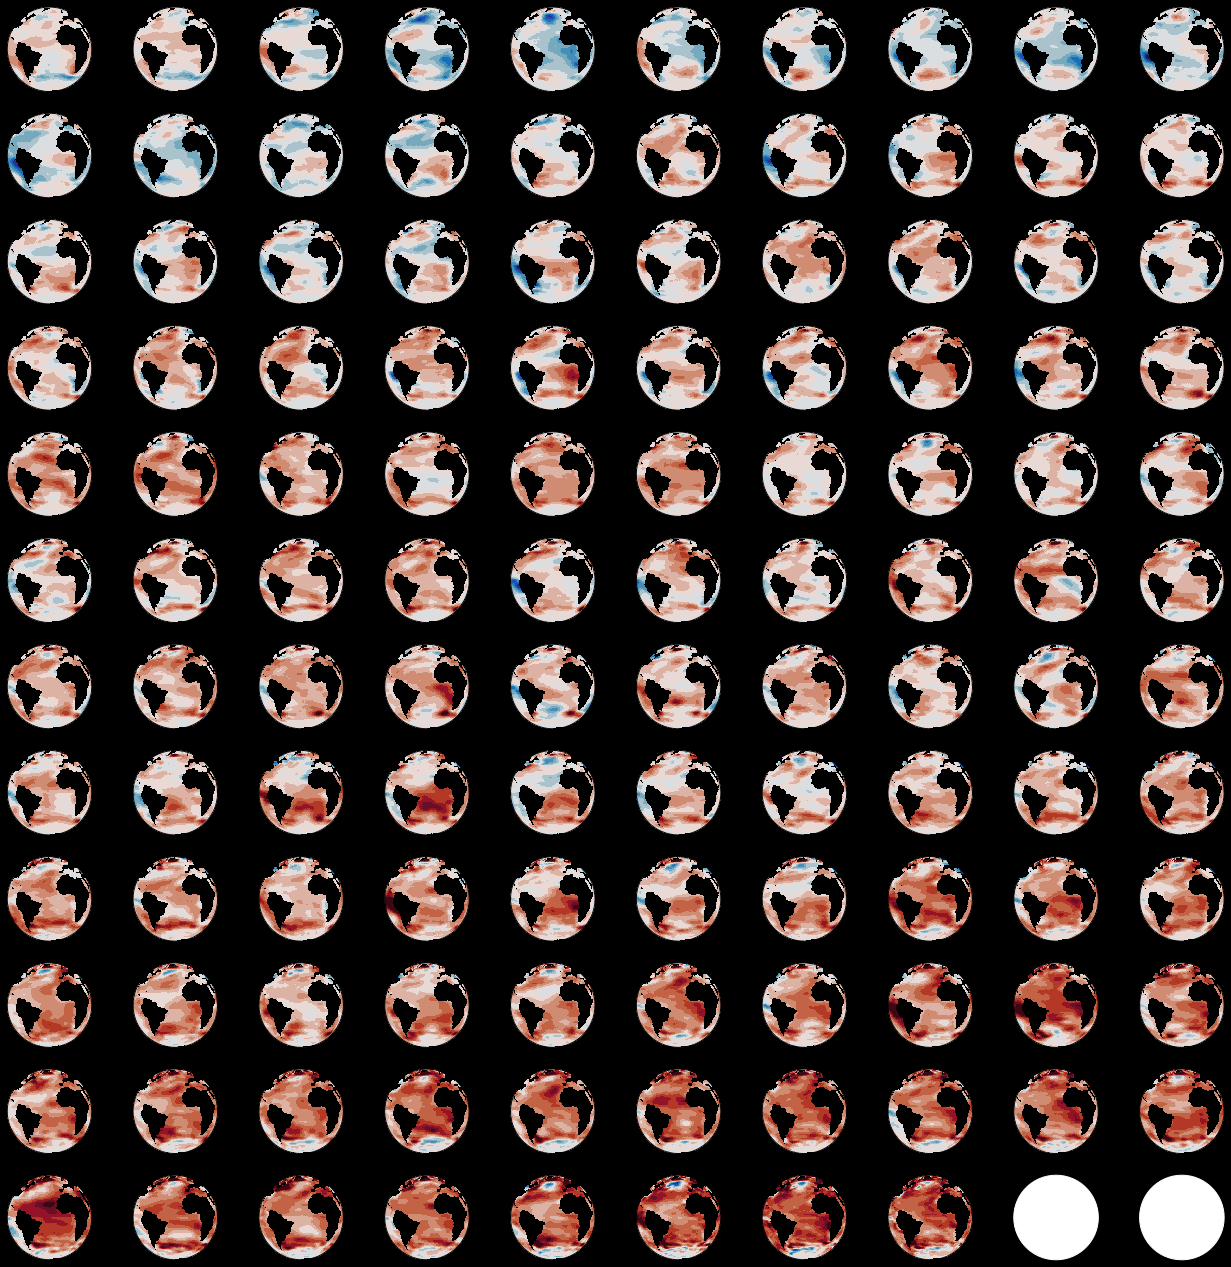

In [90]:
f, axes = plt.subplots(figsize=(18,18), ncols=10, nrows=12,
                       subplot_kw=dict(
                       projection=ccrs.Orthographic(central_longitude=-25.0, 
                                                    central_latitude=0.0)))

for i, ax in enumerate(f.axes):
    if i > 117:
        ax.outline_patch.set_edgecolor('white')
        del ax
    else:
        data = canom.isel(year=i)
        p = ax.pcolormesh(canom.lon, canom.lat,
                       data, vmin=-2, vmax=2,
                       transform=ccrs.PlateCarree(),
                       cmap=et.vis.discrete_cmap(16, cm.balance))
        ax.add_feature(cfeature.LAND, facecolor='k') 
f.tight_layout()
#plt.savefig('atlantic_small_multiples.png', bbox_inches='tight',
#pad_inches=1, transparent=True)